# CS349 Final Project : Human Activity Recognition

In [1]:
import numpy as np
import pandas as pd

### 1st Step: Import Data

In [2]:
# Data directory
Dir = '../UCI_HAR_Dataset'

# Helper functions
# Read data
def read_csv(filename):
    '''
    This function reads the .txt file
    Input:
    :param filename: .txt file
    Output:
    :param processed file  
    
    '''
    return pd.read_csv(filename,delim_whitespace=True,header=None)

# Load data
# Load x
def load_x(data):
    filename = f'{Dir}/{data}/X_{data}.txt'
    x = read_csv(filename)
    return x.to_numpy()


# load class labels
def load_y(data):
    filename = f'{Dir}/{data}/y_{data}.txt'
    y = read_csv(filename)[0]
    return y.to_numpy()


def load_data():
    X_train, X_test = load_x('train'), load_x('test')
    y_train, y_test = load_y('train'), load_y('test')
    
    return X_train, X_test, y_train, y_test
        
    

### 2nd Step: Generate Training & Testing Data

In [3]:
X_train, X_test, y_train, y_test = load_data()

In [4]:
train_data = np.concatenate((X_train,np.vstack(y_train)),axis=1)
# print(train_data.shape)
test_data = np.concatenate((X_test,np.vstack(y_test)),axis=1)
# print(test_data.shape)

# randomize dataset
np.random.shuffle(train_data)
np.random.shuffle(test_data)

X_train = train_data[:,:-1]
y_train = train_data[:,-1]

X_test = test_data[:,:-1]
y_test = test_data[:,-1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7352, 561)
(2947, 561)
(7352,)
(2947,)


In [5]:
# Let's use Linear discriminant analysis to find features that classifies the label well
# Importing libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [6]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [7]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (7352, 5)
y_train: (7352,)
X_test: (2947, 5)
y_test: (2947,)


### 3rd step: Generate all helper functions

In [8]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix,classification_report
import itertools
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [9]:
# Helper function for run models 
def run_model(model,X_train,y_train,X_test,y_test):
    results = {'training_time':[],
               'testing_time':[],
               'predictions':[],
               'Accuracy': []}
    
    # fit model & calculate training time
    train_start_time = time.time()
    model.fit(X_train,y_train)
    train_end_time = time.time()
    train_duaration = train_end_time - train_start_time
    results['training_time'].append(train_duaration)
    
    # perdict labels & calculate testing time
    test_start_time = time.time()
    y_prediction = model.predict(X_test)
    results['predictions'].append(y_prediction)
    test_end_time = time.time()
    test_duration = test_end_time - test_start_time
    results['testing_time'].append(test_duration)
    
    # Calculate the accuracy of the model
    acc = accuracy_score(y_true=y_test, y_pred=y_prediction)
    results['Accuracy'].append(acc)
    
    # Add trained model to results
    results['model'] = model
    
    return results


# Helper function for confusion matrix
def plot_confusion_mat(model,y_test,y_pred,classes,normalize=False):
    
    confusion_mat = confusion_matrix(y_test,y_pred)
    # plot confusion matrix
    
    if normalize:
        confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:,np.newaxis]

    plt.figure(figsize=(10,10))
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Reds)
    plt.title(f'{model}_Confusion_Matrix')
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = confusion_mat.max() / 2.
    for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
        plt.text(j,i,format(confusion_mat[i,j],fmt),horizontalalignment='center', \
                 color='white' if confusion_mat[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('Actual_label')
    plt.xlabel('Predicted_label')
    
    plt.show()


# Helper function for report
def model_report(model,y_test,y_pred):
    print(f'Best estimator: {model.best_estimator_}')
    print(f'Best parameters: {model.best_params_}')
    print(f'Best index: {model.best_index_}')
    print(f'Best score: {model.best_score_}')
    print('\n')
    
    print('Classification report')
    print('\n')
    report = classification_report(y_test,y_pred,target_names=Labels)
    print(report)
    

### 4th Step. Test models

### 1. Logistic Regression

In [10]:
# Labels
Labels = ['WALKING', 
          'WALKING_UPSTAIRS', 
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']

# Hyperparameters
params = {'C':[10,15,20,25,30,35,40],'penalty':['l1','l2']}

# Initialize model
log_reg_model = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000)
log_reg_model_grid = GridSearchCV(log_reg_model,
                                  param_grid=params,
                                  verbose=1,
                                  n_jobs=-1)

log_reg_model_grid_results = run_model(log_reg_model_grid,
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)



Fitting 5 folds for each of 14 candidates, totalling 70 fits


/home/dinvincible98/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.98639752        nan 0.98639752        nan 0.98639752
        nan 0.98626156        nan 0.98639752        nan 0.98639752
        nan 0.98639752]
  warnings.warn(


In [11]:
print('Training time: '+ str(log_reg_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(log_reg_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(log_reg_model_grid_results['Accuracy'][0]))


Training time: 13.694072484970093 s


Testing time: 0.0002677440643310547 s


Accuracy: 0.9630132337970818


In [12]:
y_predictions = log_reg_model_grid_results['predictions'][0]

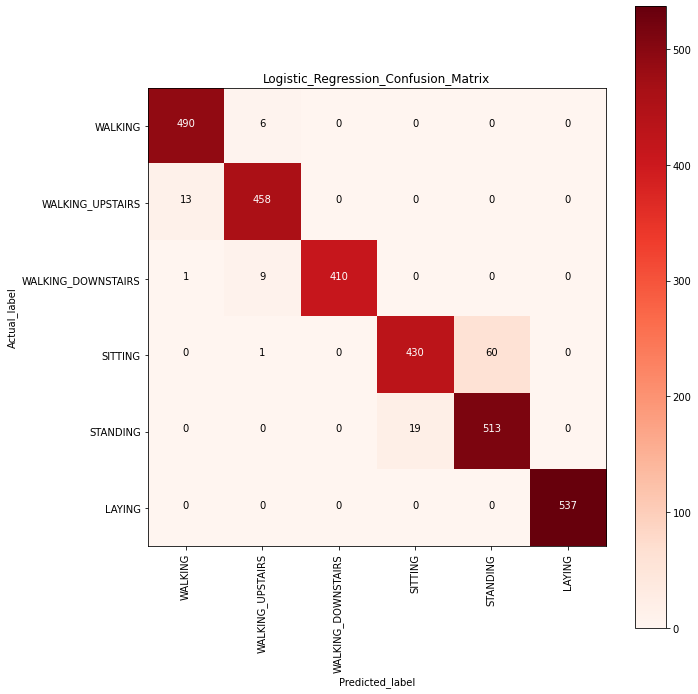

In [13]:
# plot confusion matrix
plot_confusion_mat("Logistic_Regression",y_test,y_predictions,classes=Labels)

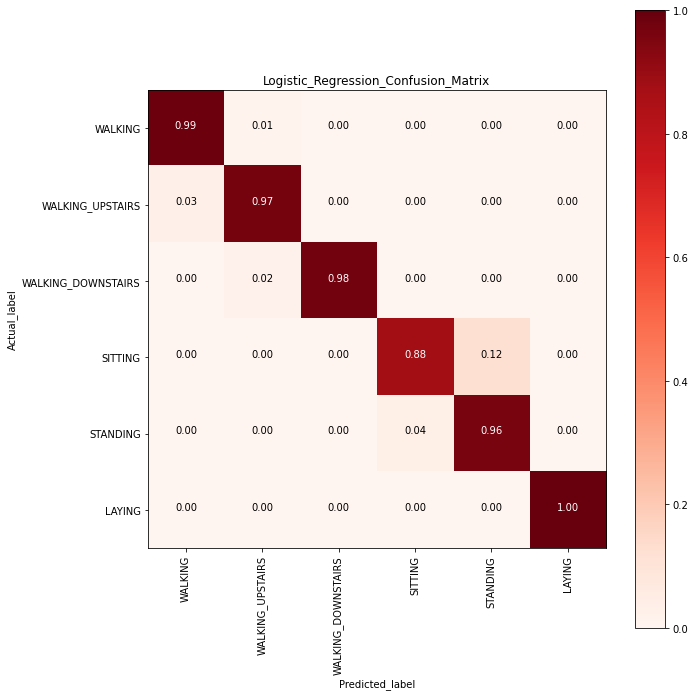

In [14]:
# plot normalized confusion matrix
plot_confusion_mat("Logistic_Regression",y_test,y_predictions,classes=Labels, normalize=True)

In [15]:
model_report(log_reg_model_grid_results['model'],y_test,y_predictions)

Best estimator: LogisticRegression(C=10, max_iter=1000)
Best parameters: {'C': 10, 'penalty': 'l2'}
Best index: 1
Best score: 0.9863975175386267


Classification report


                    precision    recall  f1-score   support

           WALKING       0.97      0.99      0.98       496
  WALKING_UPSTAIRS       0.97      0.97      0.97       471
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
           SITTING       0.96      0.88      0.91       491
          STANDING       0.90      0.96      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



### 2. SGD

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
# Hyperparameters
params = {'loss':['hinge','squared_hinge'],'alpha':[0.00001,0.0001,0.001,0.01],'penalty':['l1','l2'],'max_iter':[1000]}

# Initialize model

sgd_model = SGDClassifier()
# sgd_model.get_params().keys()
sgd_model_grid = GridSearchCV(sgd_model,
                              param_grid=params,
                              verbose=1,
                              n_jobs=-1)

sgd_model_grid_results = run_model(sgd_model_grid,
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [18]:
print('Training time: '+ str(sgd_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(sgd_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(sgd_model_grid_results['Accuracy'][0]))

Training time: 4.6563942432403564 s


Testing time: 0.0004897117614746094 s


Accuracy: 0.9653885307091958


In [19]:
y_predictions = sgd_model_grid_results['predictions'][0]

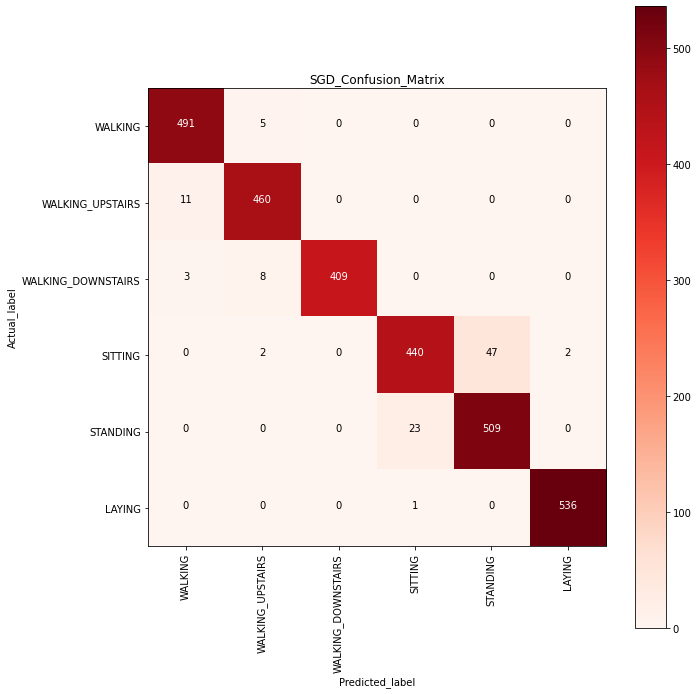

In [20]:
# plot confusion matrix
plot_confusion_mat("SGD",y_test,y_predictions,classes=Labels)

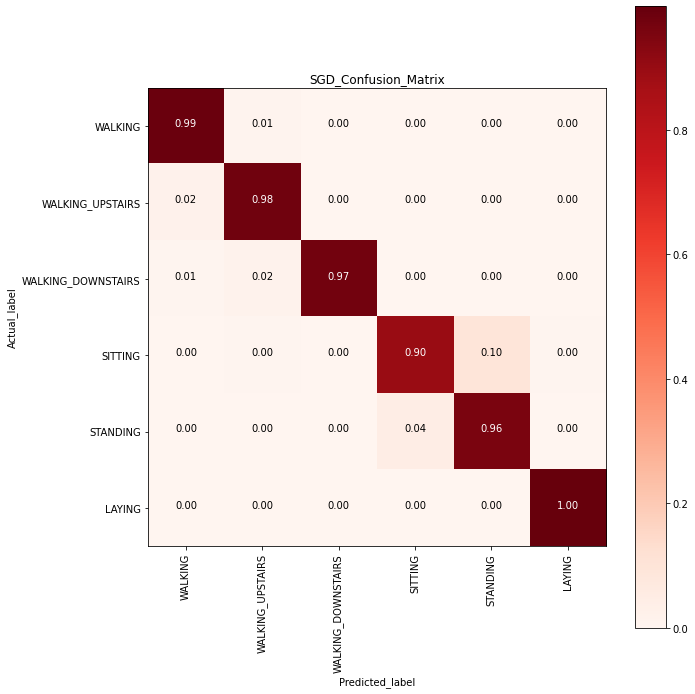

In [21]:
# plot normalized confusion matrix
plot_confusion_mat("SGD",y_test,y_predictions,classes=Labels, normalize=True)

In [22]:
model_report(sgd_model_grid_results['model'],y_test,y_predictions)

Best estimator: SGDClassifier(alpha=1e-05, loss='squared_hinge')
Best parameters: {'alpha': 1e-05, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}
Best index: 3
Best score: 0.9870776046652516


Classification report


                    precision    recall  f1-score   support

           WALKING       0.97      0.99      0.98       496
  WALKING_UPSTAIRS       0.97      0.98      0.97       471
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
           SITTING       0.95      0.90      0.92       491
          STANDING       0.92      0.96      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



### 3. Kernal SVM

In [23]:
from sklearn.svm import SVC

In [24]:
# Hyperparameters
params = {'C':[0.125,0.25,0.5,1.0], 'gamma':[0.001,0.01,0.1,1]}

# Initialize the model
rbf_svc_model = SVC(kernel='rbf')
rbf_svc_model_grid = GridSearchCV(rbf_svc_model,param_grid=params)
rbf_svc_model_grid_results = run_model(rbf_svc_model_grid,
                                 X_train,
                                 y_train,
                                 X_test,
                                 y_test)


In [25]:
print('Training time: '+ str(rbf_svc_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(rbf_svc_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(rbf_svc_model_grid_results['Accuracy'][0]))

Training time: 26.02374029159546 s


Testing time: 0.06968355178833008 s


Accuracy: 0.9657278588394977


In [26]:
y_predictions = rbf_svc_model_grid_results['predictions'][0]

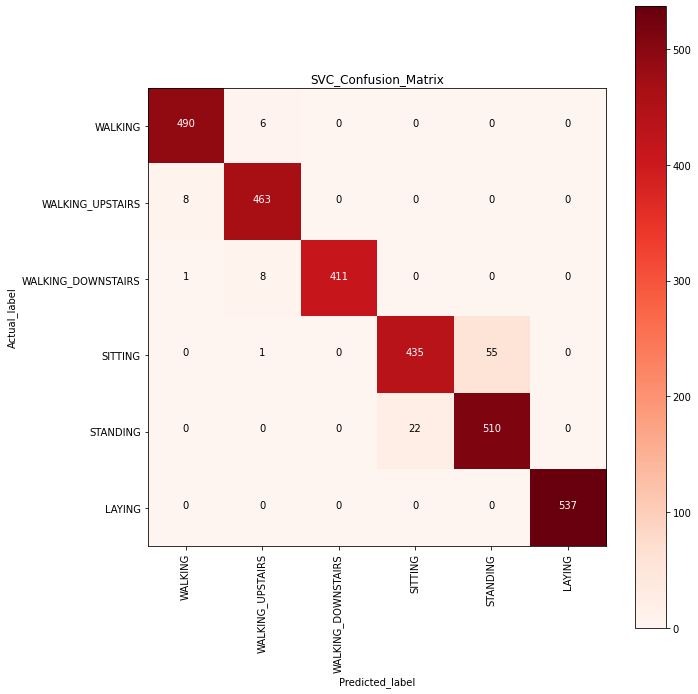

In [27]:
# plot confusion matrix
plot_confusion_mat("SVC",y_test,y_predictions,classes=Labels)

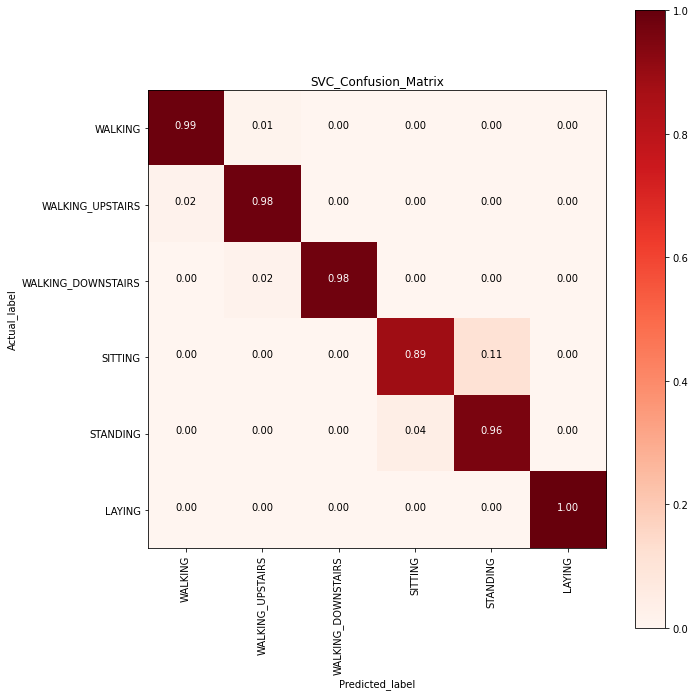

In [28]:
# plot normalized confusion matrix
plot_confusion_mat("SVC",y_test,y_predictions,classes=Labels, normalize=True)

In [29]:
# Model report

model_report(rbf_svc_model_grid_results['model'],y_test,y_predictions)

Best estimator: SVC(C=0.25, gamma=0.01)
Best parameters: {'C': 0.25, 'gamma': 0.01}
Best index: 5
Best score: 0.98694192020792


Classification report


                    precision    recall  f1-score   support

           WALKING       0.98      0.99      0.98       496
  WALKING_UPSTAIRS       0.97      0.98      0.98       471
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
           SITTING       0.95      0.89      0.92       491
          STANDING       0.90      0.96      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



###  4. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
params = {'max_depth':np.arange(2,10,1)}

# Initialize the model
d_tree_model = DecisionTreeClassifier()
d_tree_model_grid = GridSearchCV(d_tree_model,param_grid=params,verbose=1,n_jobs=-1)
d_tree_model_grid_results = run_model(d_tree_model_grid,  
                                      X_train,
                                      y_train,
                                      X_test,
                                      y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [32]:
print('Training time: '+ str(d_tree_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(d_tree_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(d_tree_model_grid_results['Accuracy'][0]))

Training time: 0.16954708099365234 s


Testing time: 0.0003376007080078125 s


Accuracy: 0.9518154054971157


In [33]:
y_predictions = d_tree_model_grid_results['predictions'][0]

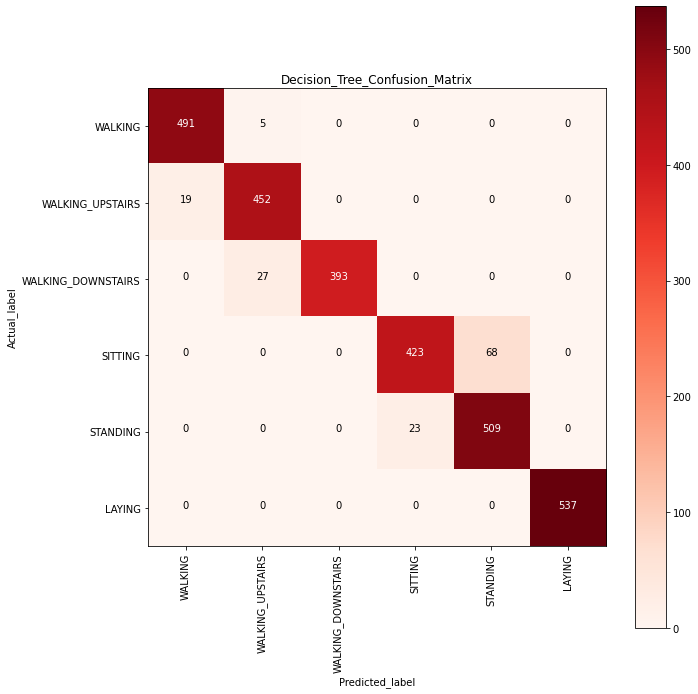

In [34]:
# plot confusion matrix
plot_confusion_mat("Decision_Tree",y_test,y_predictions,classes=Labels)

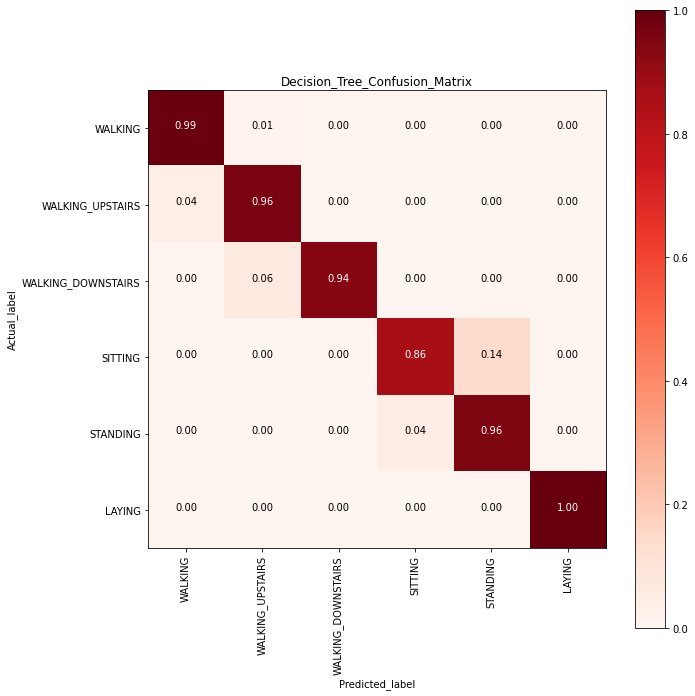

In [35]:
# plot normalized confusion matrix
plot_confusion_mat("Decision_Tree",y_test,y_predictions,classes=Labels, normalize=True)

In [36]:
model_report(d_tree_model_grid_results['model'],y_test,y_predictions)

Best estimator: DecisionTreeClassifier(max_depth=6)
Best parameters: {'max_depth': 6}
Best index: 4
Best score: 0.9844932180894113


Classification report


                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.98       496
  WALKING_UPSTAIRS       0.93      0.96      0.95       471
WALKING_DOWNSTAIRS       1.00      0.94      0.97       420
           SITTING       0.95      0.86      0.90       491
          STANDING       0.88      0.96      0.92       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



### 5. Multi-layer Perceptron (MLP) 

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
# Hyperparameters
params = {'alpha':[0.00001,0.0001,0.001,0.01],
          'solver':['lbfgs','adam'],
          'max_iter':[2000]}

# Initialze model
MLP_model = MLPClassifier()
# MLP_model.get_params().items()
MLP_model_grid = GridSearchCV(MLP_model,
                              param_grid=params,
                              verbose=1,
                              n_jobs=-1)
MLP_model_grid_results = run_model(MLP_model_grid,
                                   X_train,
                                   y_train,
                                   X_test,
                                   y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [39]:
print('Training time: '+ str(MLP_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(MLP_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(MLP_model_grid_results['Accuracy'][0]))

Training time: 93.53735113143921 s


Testing time: 0.027609825134277344 s


Accuracy: 0.9677638276213099


In [40]:
y_predictions = MLP_model_grid_results['predictions'][0]

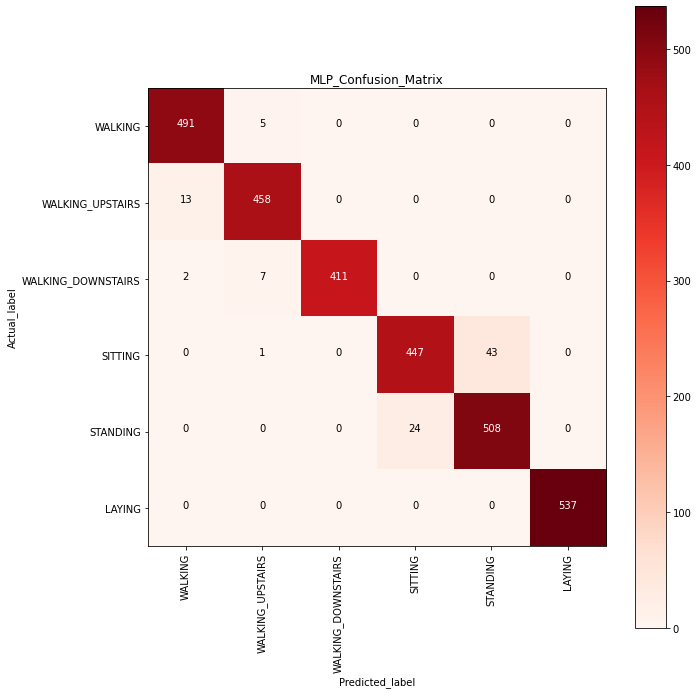

In [41]:
# plot confusion matrix
plot_confusion_mat("MLP",y_test,y_predictions,classes=Labels)

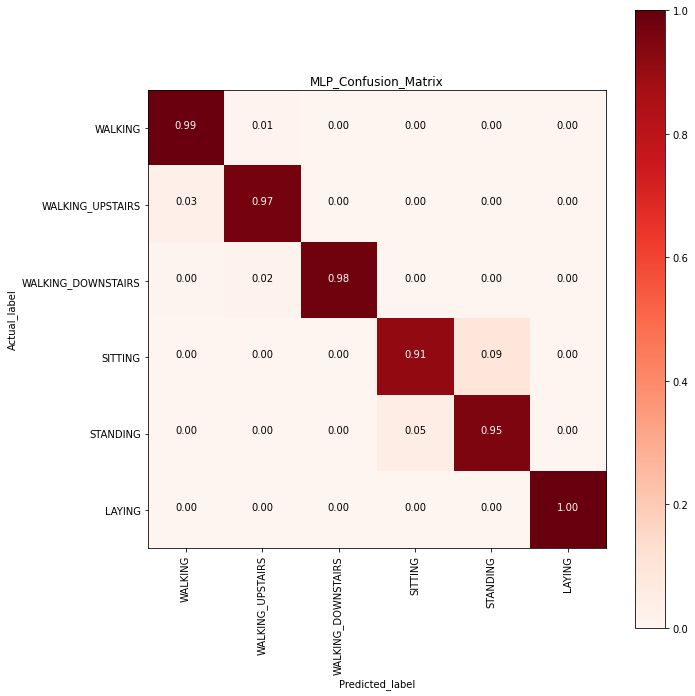

In [42]:
# plot normalized confusion matrix
plot_confusion_mat("MLP",y_test,y_predictions,classes=Labels, normalize=True)

In [43]:
model_report(MLP_model_grid_results['model'],y_test,y_predictions)

Best estimator: MLPClassifier(alpha=0.01, max_iter=2000)
Best parameters: {'alpha': 0.01, 'max_iter': 2000, 'solver': 'adam'}
Best index: 7
Best score: 0.9872136590870202


Classification report


                    precision    recall  f1-score   support

           WALKING       0.97      0.99      0.98       496
  WALKING_UPSTAIRS       0.97      0.97      0.97       471
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
           SITTING       0.95      0.91      0.93       491
          STANDING       0.92      0.95      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



### 6.KNN 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Hyperparameter
params = {'n_neighbors':[10,15,20,25,30]}

# Initialize the model
Knn_model = KNeighborsClassifier()
#Knn_model.get_params().items()
Knn_model_grid = GridSearchCV(Knn_model,param_grid=params,verbose=1,n_jobs=-1)
Knn_model_grid_results = run_model(Knn_model_grid, X_train,y_train,X_test,y_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [46]:
print('Training time: '+ str(Knn_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(Knn_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(Knn_model_grid_results['Accuracy'][0]))

Training time: 0.6692221164703369 s


Testing time: 0.178663969039917 s


Accuracy: 0.9643705463182898


In [47]:
y_predictions = Knn_model_grid_results['predictions'][0]

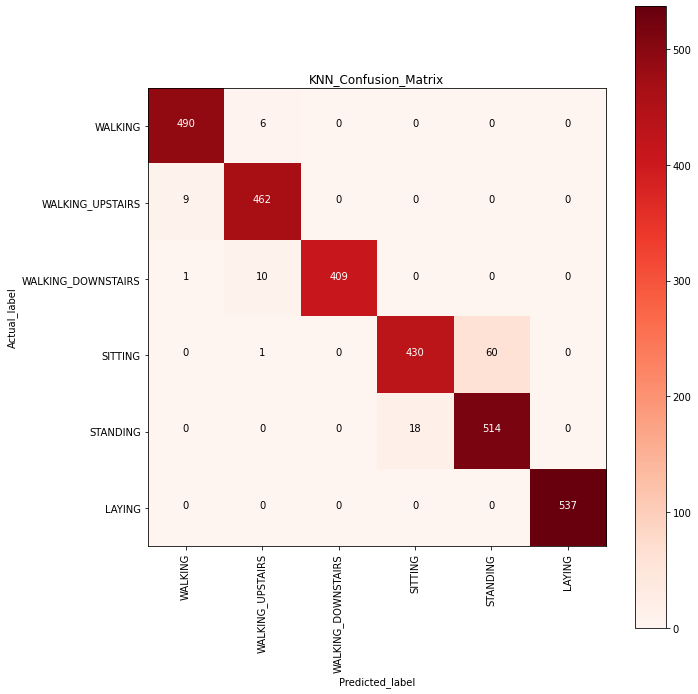

In [48]:
# plot confusion matrix
plot_confusion_mat("KNN",y_test,y_predictions,classes=Labels)

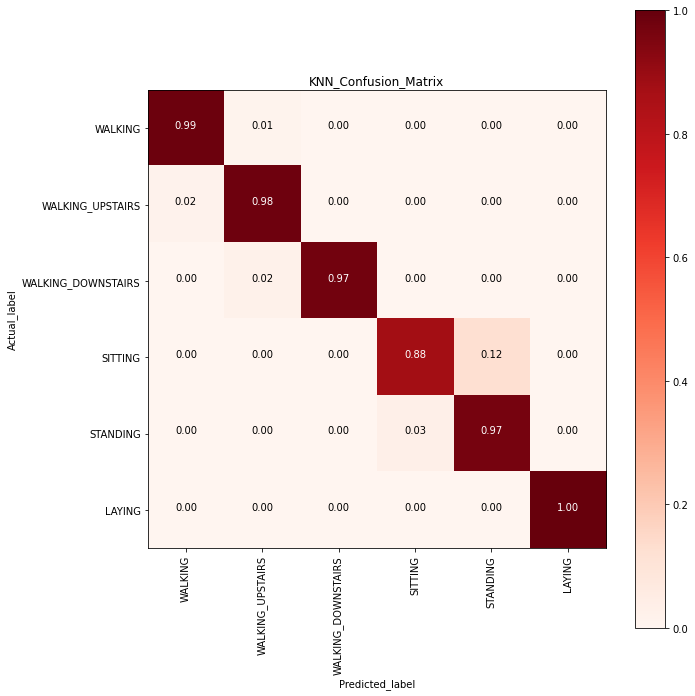

In [49]:
# plot normalized confusion matrix
plot_confusion_mat("KNN",y_test,y_predictions,classes=Labels, normalize=True)

In [50]:
model_report(Knn_model_grid_results['model'],y_test,y_predictions)

Best estimator: KNeighborsClassifier(n_neighbors=15)
Best parameters: {'n_neighbors': 15}
Best index: 1
Best score: 0.9865334794692859


Classification report


                    precision    recall  f1-score   support

           WALKING       0.98      0.99      0.98       496
  WALKING_UPSTAIRS       0.96      0.98      0.97       471
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.96      0.96      2947

